In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
FIVE, FOUR, THREE, TWO, ONE, ZERO = 5, 4, 3, 2, 1, 0

data_table = pd.DataFrame(columns=["league_id", "week", "hour", "minute", "HT", "AT", "HCS", "ACS"])

In [ ]:

def txt_reader(_path):
    file = open(_path, 'r')  # Open the file in read mode
    contents = file.read()  # Read the contents of the file
    file.close()  # Close the file

    return contents


def table_creator(contents):
    record_list = []
    weeks = contents.split("WEEK")
    pos = weeks[0].index("League")
    league_no = int(weeks[0][(pos + 7): (pos + 11)])
    for val in weeks[1:]:
        scores = val.split("\n")[1:-1]
        for score in scores:
            temp_dict = {
                "league_id": league_no,
                "week": int((val[:3]).strip()),
                "hour": int(val.split("\n")[0][-8:-6]),
                "minute": int(val.split("\n")[0][-5:-3]),

                "HT": score[0:3],
                "AT": score[8:11],
                "HCS": int(score[4]),
                "ACS": int(score[6])
            }

            # data._append(temp_dict, ignore_index=True)
            record_list.append(temp_dict)
    data = pd.DataFrame(record_list)

    return data

In [ ]:
record = txt_reader("sample_4.txt")
df = table_creator(record)
df.head()

,league_id,week,hour,minute,HT,AT,HCS,ACS
0,1474,1,11,28,SHU,ASV,1,3
1,1474,1,11,28,MNU,WHU,2,1
2,1474,1,11,28,ARS,WOL,6,0
3,1474,1,11,28,NWC,BRN,2,1
4,1474,1,11,28,FOR,CHE,0,5


In [ ]:

class Team:
    def __init__(self, name):
        self.name = name
        self.goals_for = 0
        self.goals_against = 0
        self.goal_difference = 0
        self.points = 0
        self.position = 0


def update_table(team_1, team_1_score, team_2, team_2_score):
    team1 = next(team for team in team_objects if team.name == team_1)
    team2 = next(team for team in team_objects if team.name == team_2)

    team1.goals_for += team_1_score
    team1.goals_against += team_2_score
    team1.goal_difference = team1.goals_for - team1.goals_against
    team1.points += 3 if team_1_score > team_2_score else 1 if team_1_score == team_2_score else 0

    team2.goals_for += team_2_score
    team2.goals_against += team_1_score
    team2.goal_difference = team2.goals_for - team2.goals_against
    team2.points += 3 if team_2_score > team_1_score else 1 if team_2_score == team_1_score else 0

    table = sorted(team_objects, key=lambda x: (-x.points, x.name.lower()))

    for i, team in enumerate(table):
        team.position = i + 1

    return table


def get_record(table_objects):
    table_dict = dict()
    for team in table_objects:
        table_dict[team.name] = (
            team.goals_for,
            team.goals_against,
            team.goal_difference,
            team.points,
            team.position
        )

    return table_dict


def add_features(data):
    df = data.copy()

    col_list = []

    for i, row in df.iterrows():
        ht, hcs, at, acs = row["HT"], row["HCS"], row["AT"], row["ACS"]

        table = update_table(ht, hcs, at, acs)

        if row["week"] > 1:
            col_list.append(table_dict[ht] + table_dict[at])
        else:
            col_list.append((0,) * 10)

        if (i+1) % 10 == 0:
            table_dict = get_record(table)

    # Create a DataFrame from the list of tuples
    new_df = pd.DataFrame(col_list, columns=[
        "h_gf", "h_ga", "h_gd", "h_pts", "h_pos", 
        "a_gf", "a_ga", "a_gd", "a_pts", "a_pos"])

    # Concatenate the new DataFrame with the existing DataFrame
    df = pd.concat([df, new_df], axis=1)

    return df


# Reading the TXT data

In [ ]:
path = "league_data"
test_record = [f"{path}/L_18.txt"]
records = [
    f"{path}/L_6095.txt", f"{path}/L_6097.txt", f"{path}/L_6099.txt",
    f"{path}/L_6148.txt", f"{path}/L_6152.txt", f"{path}/L_6153.txt",
    f"{path}/L_6155.txt", f"{path}/L_6155.txt", f"{path}/L_6166.txt",
    f"{path}/L_6169.txt", f"{path}/L_6170.txt", f"{path}/L_6171.txt",
    f"{path}/L_6173.txt", f"{path}/L_6180.txt", f"{path}/L_6181.txt",
    f"{path}/L_6189.txt", f"{path}/L_6192.txt", f"{path}/L_6211.txt",
    f"{path}/L_6212.txt", f"{path}/L_6213.txt", f"{path}/L_6214.txt",
    f"{path}/L_6215.txt", f"{path}/L_6216.txt", f"{path}/L_6226.txt", 
    f"{path}/L_6227.txt", f"{path}/L_6230.txt"
]

# Data Preprocessing

In [ ]:

# teams = ['FOR', 'MNC', 'ASV', 'TOT', 'EVE', 'CHE', 'BRN', 'WHU', 'ARS', 'FUL', 
#          'NWC', 'BOU', 'BUR', 'LIV', 'WOL', 'MNU', 'LUT', 'SHU', 'BRI', 'CRY']

teams = ['FOR', 'MNC', 'ASV', 'TOT', 'EVE', 'CHE', 'BRN', 'WHU', 'ARS', 'FUL', 
         'NWC', 'BOU', 'LEI', 'LIV', 'WOL', 'MNU', 'LEE', 'SOU', 'BRI', 'CRY']


df_temp = []
for record in records:
    text = txt_reader(record)  # read each txt data
    new_df = table_creator(text)  # convert each txt data to a dataframe
    
    # create a new empty league table to record scores & points
    team_objects = [Team(team) for team in teams]

    # adds scores & points from each league to the dataframe
    new_df = add_features(new_df)

    df_temp.append(new_df)  # add each dataframe to a list

df_records = pd.concat(df_temp, axis=0)
df_records

,league_id,week,hour,minute,HT,AT,HCS,ACS,h_gf,h_ga,h_gd,h_pts,h_pos,a_gf,a_ga,a_gd,a_pts,a_pos
0,6095,1,12,52,EVE,MNC,1,2,0,0,0,0,0,0,0,0,0,0
1,6095,1,12,52,BRN,TOT,0,1,0,0,0,0,0,0,0,0,0,0
2,6095,1,12,52,BRI,FUL,1,0,0,0,0,0,0,0,0,0,0,0
3,6095,1,12,52,LEI,WHU,2,1,0,0,0,0,0,0,0,0,0,0
4,6095,1,12,52,WOL,ARS,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6230,38,17,6,LIV,NWC,5,0,76,38,38,74,2,47,49,-2,50,10
376,6230,38,17,6,WHU,TOT,1,3,46,54,-8,42,13,59,55,4,64,6
377,6230,38,17,6,ASV,MNC,1,3,48,36,12,56,7,85,31,54,87,1
378,6230,38,17,6,FOR,EVE,0,1,32,55,-23,33,18,43,41,2,55,8


In [ ]:
df_records[df_records["week"] == 2].head(10)

,league_id,week,hour,minute,HT,AT,HCS,ACS,h_gf,h_ga,h_gd,h_pts,h_pos,a_gf,a_ga,a_gd,a_pts,a_pos
10,6095,2,12,54,FUL,BRN,0,0,0,1,-1,0,18,0,1,-1,0,15
11,6095,2,12,54,FOR,ASV,0,2,1,3,-2,0,17,2,3,-1,0,14
12,6095,2,12,54,NWC,LEI,1,0,2,0,2,3,6,2,1,1,3,3
13,6095,2,12,54,LIV,BRI,3,1,3,2,1,3,4,1,0,1,3,1
14,6095,2,12,54,MNC,CRY,4,0,2,1,1,3,5,3,1,2,3,2
15,6095,2,12,54,ARS,EVE,4,1,0,0,0,1,8,1,2,-1,0,16
16,6095,2,12,54,BOU,SOU,2,2,2,2,0,1,9,0,2,-2,0,19
17,6095,2,12,54,WHU,WOL,2,0,1,2,-1,0,20,0,0,0,1,13
18,6095,2,12,54,CHE,LEE,1,0,3,3,0,1,10,2,2,0,1,11
19,6095,2,12,54,MNU,TOT,3,1,3,3,0,1,12,1,0,1,3,7


In [ ]:
# Define function to check home and away scores and return result
def get_result(row):
    if row['HCS'] > row['ACS']:
        return 1  # home_win = 1
    elif row['HCS'] < row['ACS']:
        return 2  # away_win = 2
    else:
        return 0  # draw = 0
        

def feature_engineering(data):
    df_result = data.copy()
        
    # Apply function to each row of the dataframe to create a new column
    df_result['result'] = df_result.apply(get_result, axis=1)

    df_result = df_result[df_result['week'] > 1]  # remove rows with incomplete values

    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Fit the LabelEncoder on the unique team names
    label_encoder.fit(teams)

    # Convert the categorical features to numeric using label encoding
    df_result['HT_encoded'] = label_encoder.transform(df_result['HT'])
    df_result['AT_encoded'] = label_encoder.transform(df_result['AT'])

    # remove irrelevant features
    df_result = df_result.drop(["league_id", "week", "hour", "minute", "HCS", "ACS", "HT", "AT"], axis=1)  

    df_result = df_result.reset_index(drop=True)  # reset the index values

    # Scaling the dataset using standardization method
    X = df_result.drop("result", axis=1)
    y = df_result["result"]

    # assume that X is your dataset with numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # # concatenate the scaled numerical features with the Target variable feature
    data_preprocessed = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

    return data_preprocessed


processed_df = feature_engineering(df_records)

In [ ]:
processed_df

,h_gf,h_ga,h_gd,h_pts,h_pos,a_gf,a_ga,a_gd,a_pts,a_pos,result
0,-1.573762,-1.556957,-0.069598,-1.507625,1.281760,-1.580357,-1.549334,-0.087200,-1.518929,0.798609,0
1,-1.512257,-1.430884,-0.147934,-1.507625,1.108666,-1.457284,-1.423218,-0.087200,-1.518929,0.624810,2
2,-1.450752,-1.619994,0.165409,-1.333043,-0.795369,-1.457284,-1.549334,0.069700,-1.343996,-1.286981,1
3,-1.389248,-1.493921,0.087073,-1.333043,-1.141557,-1.518820,-1.612392,0.069700,-1.343996,-1.634579,1
4,-1.450752,-1.556957,0.087073,-1.333043,-0.968463,-1.395747,-1.549334,0.148150,-1.343996,-1.460780,1
...,...,...,...,...,...,...,...,...,...,...,...
9615,3.100583,0.775396,2.985496,2.798735,-1.487745,1.311873,1.477453,-0.165650,1.396621,-0.070387,1
9616,1.255447,1.783981,-0.617949,0.936525,0.416289,2.050314,1.855802,0.305050,2.212975,-0.765584,2
9617,1.378456,0.649323,0.948767,1.751242,-0.622275,3.650271,0.342408,4.227557,3.554128,-1.634579,2
9618,0.394383,1.847017,-1.792985,0.412779,1.281760,1.065725,0.972989,0.148150,1.688176,-0.417985,2


# Modelling

Random Forest:
Accuracy: 0.45
F1 score: 0.438
----------------------------------------
SVC:
Accuracy: 0.461
F1 score: 0.373
----------------------------------------
XGBoost:
Accuracy: 0.427
F1 score: 0.407
----------------------------------------
Gradient Boost:
Accuracy: 0.46
F1 score: 0.399
----------------------------------------
Logistic Regression:
Accuracy: 0.464
F1 score: 0.382
----------------------------------------
K-Nearest Neighbors:
Accuracy: 0.39
F1 score: 0.386
----------------------------------------


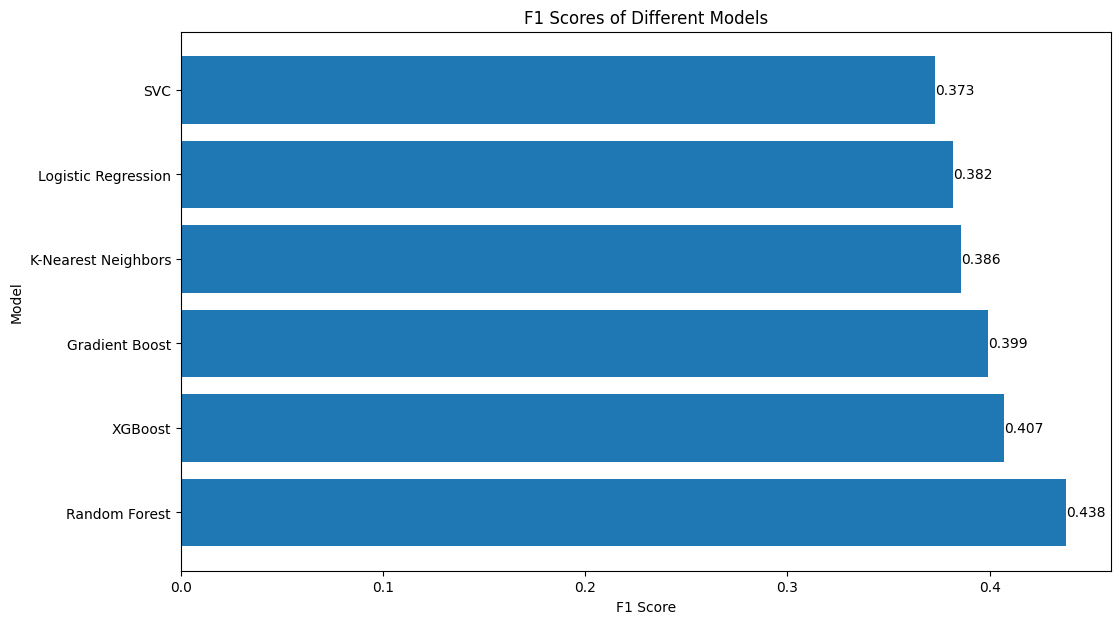

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset into a pandas DataFrame
dataset = processed_df.copy()

# Load your dataset into X and y arrays
X = dataset.drop("result", axis=1)
y = dataset["result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Calculate the F1 scores for each model
model_scores = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    model_scores.append((model_name, f1))
    print(f'{model_name}:')
    print('Accuracy:', accuracy)
    print('F1 score:', f1)
    print('-' * 40)

# Sort the models based on F1 scores in descending order
model_scores.sort(key=lambda x: x[1], reverse=True)
model_names, f1_scores = zip(*model_scores)

# Plot the horizontal bar graph
plt.figure(figsize=(12, 7))
plt.barh(model_names, f1_scores)  # <-- Use plt.barh() for horizontal bars
plt.ylabel('Model')
plt.xlabel('F1 Score')
plt.title('F1 Scores of Different Models')

# Add the scores beside each bar
for i, score in enumerate(f1_scores):
    plt.text(score, i, f'{score:.3f}', ha='left', va='center')  # <-- Adjust text position

# Display the horizontal bar graph
plt.show()

In [ ]:
# Random Forest:
# Accuracy: 0.47058823529411764
# F1 score: 0.45390600684718324
# ----------------------------------------
# SVC:
# Accuracy: 0.47058823529411764
# F1 score: 0.46260683760683763
# ----------------------------------------
# XGBoost:
# Accuracy: 0.38235294117647056
# F1 score: 0.3877237851662404
# ----------------------------------------
# Gradient Boost:
# Accuracy: 0.5
# F1 score: 0.5054731457800512
# ----------------------------------------
# Logistic Regression:
# Accuracy: 0.4411764705882353
# F1 score: 0.4337237157306362
# ----------------------------------------
# K-Nearest Neighbors:
# Accuracy: 0.4411764705882353
# F1 score: 0.4543904518329071



# Random Forest:
# Accuracy: 0.5
# F1 score: 0.509
# ----------------------------------------
# SVC:
# Accuracy: 0.588
# F1 score: 0.588
# ----------------------------------------
# XGBoost:
# Accuracy: 0.324
# F1 score: 0.338
# ----------------------------------------
# Gradient Boost:
# Accuracy: 0.441
# F1 score: 0.435
# ----------------------------------------
# Logistic Regression:
# Accuracy: 0.471
# F1 score: 0.459
# ----------------------------------------
# K-Nearest Neighbors:
# Accuracy: 0.412
# F1 score: 0.412


# Random Forest:
# Accuracy: 0.473
# F1 score: 0.469
# ----------------------------------------
# SVC:
# Accuracy: 0.459
# F1 score: 0.384
# ----------------------------------------
# XGBoost:
# Accuracy: 0.446
# F1 score: 0.455
# ----------------------------------------
# Gradient Boost:
# Accuracy: 0.446
# F1 score: 0.447
# ----------------------------------------
# Logistic Regression:
# Accuracy: 0.446
# F1 score: 0.38
# ----------------------------------------
# K-Nearest Neighbors:
# Accuracy: 0.5
# F1 score: 0.488

# Random Forest:
# Accuracy: 0.45
# F1 score: 0.438
# ----------------------------------------
# SVC:
# Accuracy: 0.461
# F1 score: 0.373
# ----------------------------------------
# XGBoost:
# Accuracy: 0.427
# F1 score: 0.407
# ----------------------------------------
# Gradient Boost:
# Accuracy: 0.46
# F1 score: 0.399
# ----------------------------------------
# Logistic Regression:
# Accuracy: 0.464
# F1 score: 0.382
# ----------------------------------------
# K-Nearest Neighbors:
# Accuracy: 0.39
# F1 score: 0.386

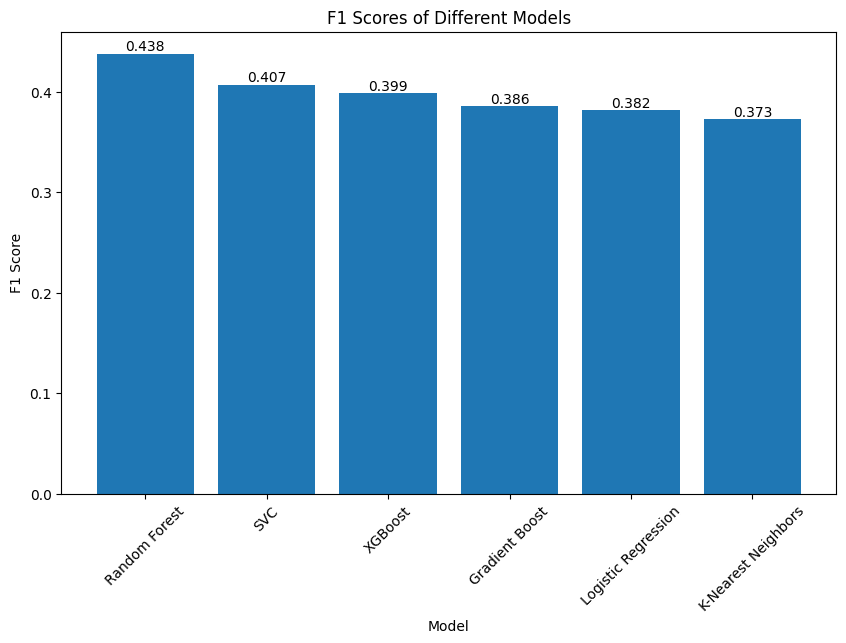

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and corresponding F1 scores
model_names = models.keys()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=45)

# Add the scores on top of each bar
for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

# Display the bar graph
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Load your dataset into a pandas DataFrame
dataset = processed_df.copy()

# Load your dataset into X and y arrays
X = dataset.drop("result", axis=1)
y = dataset["result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 score:', f1)

In [ ]:
league_record = pd.read_csv("league_record.csv")
league_record.shape

(9880, 44)

In [ ]:
league_record.columns.tolist()

['league_id',
 'week',
 'hour',
 'minutes',
 'HT',
 'AT',
 'HCS',
 'ACS',
 'HL1S',
 'AL1S',
 'HL2S',
 'AL2S',
 'HL3S',
 'AL3S',
 'hl1_stat',
 'al1_stat',
 'hl2_stat',
 'al2_stat',
 'hl3_stat',
 'al3_stat',
 'h_wins',
 'a_wins',
 'h_draws',
 'a_draws',
 'h_loss',
 'a_loss',
 'h_gf',
 'a_gf',
 'h_ga',
 'a_ga',
 'h_gd',
 'a_gd',
 'hs_avg',
 'as_avg',
 'hw_rat',
 'aw_rat',
 'hl_rat',
 'al_rat',
 'hd_rat',
 'ad_rat',
 'ht_points',
 'at_points',
 'ht_pos',
 'at_pos']